In [1]:
import sys

sys.path.append("../")

In [2]:
import cheetah
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from gymnasium import spaces
from gymnasium.wrappers import RescaleAction
from stable_baselines3.common.env_checker import check_env

from compare.github_vanilla.environment import e_trajectory_simENV
from src.environments.awake_e_steering import AwakeESteering
from src.wrappers import RescaleObservation

In [3]:
old_env = e_trajectory_simENV()

new_env = AwakeESteering(max_steerer_delta=3e-4)
wrapped_new_env = RescaleAction(new_env, -1, 1)
wrapped_new_env = RescaleObservation(
    wrapped_new_env, -1, 1, assumed_space=spaces.Box(-1e-2, 1e-2, shape=(10,))
)

/Users/jankaiser/Documents/DESY/rl4aa24-tutorial/notebooks/../compare/github_vanilla/utils/twissReader.py:433: UserWarning: MISSING FIELD PX IN TWISS INPUT ../src/environments/electron_tt43.out
  twissH, twissV = readTwissFromMADX(filename_awakeElectron)
/Users/jankaiser/Documents/DESY/rl4aa24-tutorial/notebooks/../compare/github_vanilla/utils/twissReader.py:433: UserWarning: MISSING FIELD PY IN TWISS INPUT../src/environments/electron_tt43.out
  twissH, twissV = readTwissFromMADX(filename_awakeElectron)


In [4]:
# check_env(old_env)

In [5]:
check_env(wrapped_new_env)

In [6]:
old_env.action_space

Box(-1.0, 1.0, (10,), float32)

In [7]:
new_env.action_space

Box(-0.0003, 0.0003, (10,), float32)

In [8]:
wrapped_new_env.action_space

Box(-1.0, 1.0, (10,), float32)

In [9]:
old_env.observation_space

Box(-1.0, 1.0, (10,), float32)

In [10]:
new_env.observation_space

Box(-inf, inf, (10,), float32)

In [11]:
wrapped_new_env.observation_space

Box(-inf, inf, (10,), float32)

In [12]:
old_env.reset()

(array([ 0.00610908,  0.00649554,  0.02229339,  0.02823264,  0.05950831,
        -0.04138004, -0.10385128, -0.06661472, -0.00495141,  0.06228084],
       dtype=float32),
 {})

In [13]:
new_env.reset()

(array([-0.00016896, -0.00029794, -0.0007621 , -0.00129437, -0.00279812,
         0.00341804,  0.00771267,  0.00607212,  0.0038608 ,  0.00254178],
       dtype=float32),
 {'steerer_settings': array([-1.8561292e-04,  1.1546748e-04, -9.3541872e-05,  1.7452594e-04,
          1.6023350e-04,  2.9274381e-05,  2.3045088e-04, -6.5157553e-07,
         -1.9798902e-04, -3.1487467e-05], dtype=float32),
  'backend_info': {'incoming_beam': array([1.9006870e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
          0.0000000e+00, 1.1597413e-03, 2.3194827e-04, 1.1597413e-03,
          2.3194827e-04, 1.0000000e-06, 1.0000000e-06], dtype=float32),
   'quadrupole_settings': array([ -5.085799,   9.504011,  -8.240125, -31.725054,  19.703522,
          -31.725054,  -7.92377 ,  26.87176 ,  -1.07907 ,  16.7789  ,
          -14.029   ], dtype=float32)}})

In [14]:
wrapped_new_env.reset()

(array([ 0.02153623,  0.02762532,  0.06268895,  0.13551283,  0.35506928,
        -0.4440241 , -0.95897806, -0.7487354 , -0.46350247, -0.2701667 ],
       dtype=float32),
 {'steerer_settings': array([ 2.3658328e-04, -2.4407217e-04,  1.0571496e-04,  1.9531380e-04,
          1.1570201e-05, -2.8391322e-04,  2.1542457e-04, -2.0520232e-04,
          2.8687427e-04,  1.5897221e-04], dtype=float32),
  'backend_info': {'incoming_beam': array([1.9006870e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
          0.0000000e+00, 1.1597413e-03, 2.3194827e-04, 1.1597413e-03,
          2.3194827e-04, 1.0000000e-06, 1.0000000e-06], dtype=float32),
   'quadrupole_settings': array([ -5.085799,   9.504011,  -8.240125, -31.725054,  19.703522,
          -31.725054,  -7.92377 ,  26.87176 ,  -1.07907 ,  16.7789  ,
          -14.029   ], dtype=float32)}})

In [15]:
%%timeit
_, _ = old_env.reset()

4.46 µs ± 6.98 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [16]:
%%timeit
_, _ = wrapped_new_env.reset()

5.92 ms ± 17 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
%%timeit
_, _, _, _, _ = old_env.step(old_env.action_space.sample())

23.1 µs ± 29.3 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [18]:
%%timeit
_, _, _, _, _ = wrapped_new_env.step(wrapped_new_env.action_space.sample())

5.97 ms ± 28.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


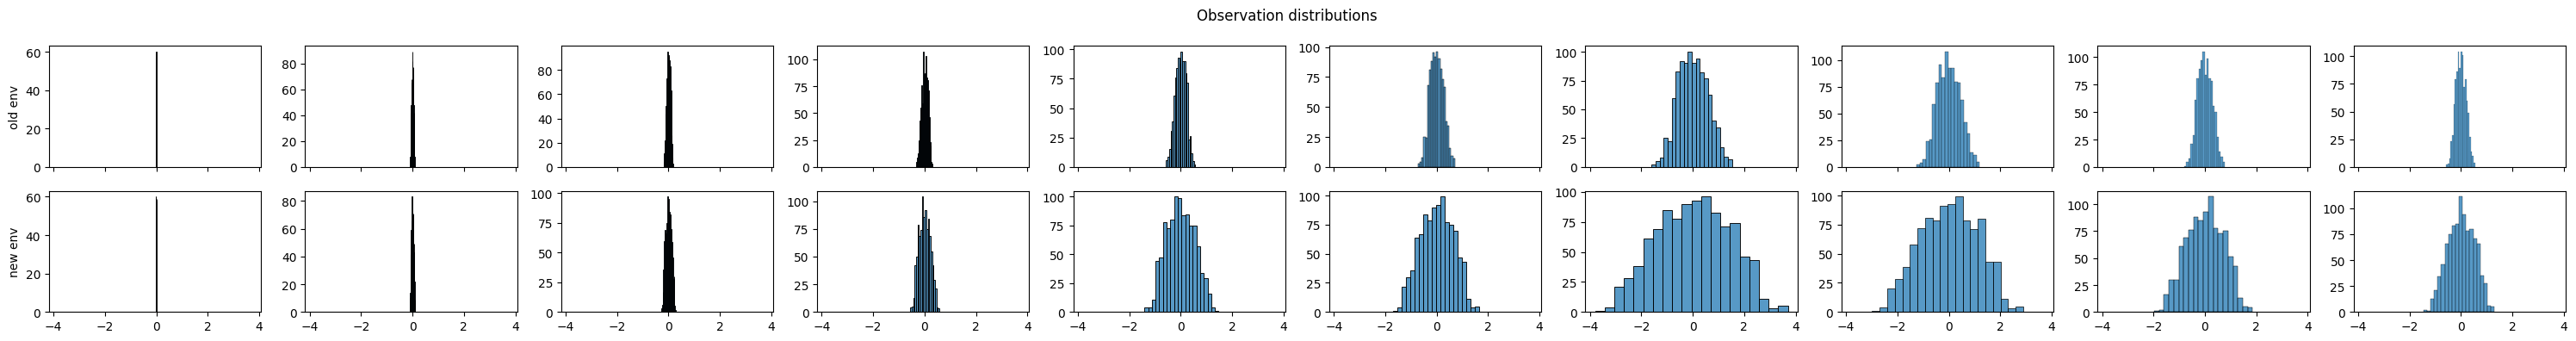

In [19]:
old_env_observations = []
new_env_observations = []
for _ in range(1_000):
    old_env_observations.append(old_env.reset()[0])
    new_env_observations.append(wrapped_new_env.reset()[0])

old_env_observations = np.array(old_env_observations)
new_env_observations = np.array(new_env_observations)

fig, axs = plt.subplots(2, 10, figsize=(30, 4), sharex=True)
for i in range(10):
    sns.histplot(old_env_observations[:, i], ax=axs[0, i], bins=20)
    sns.histplot(new_env_observations[:, i], ax=axs[1, i], bins=20)
    axs[0, i].set_ylabel(None)
    axs[1, i].set_ylabel(None)
axs[0, 0].set_ylabel("old env")
axs[1, 0].set_ylabel("new env")
fig.suptitle("Observation distributions")
plt.tight_layout()
plt.show()

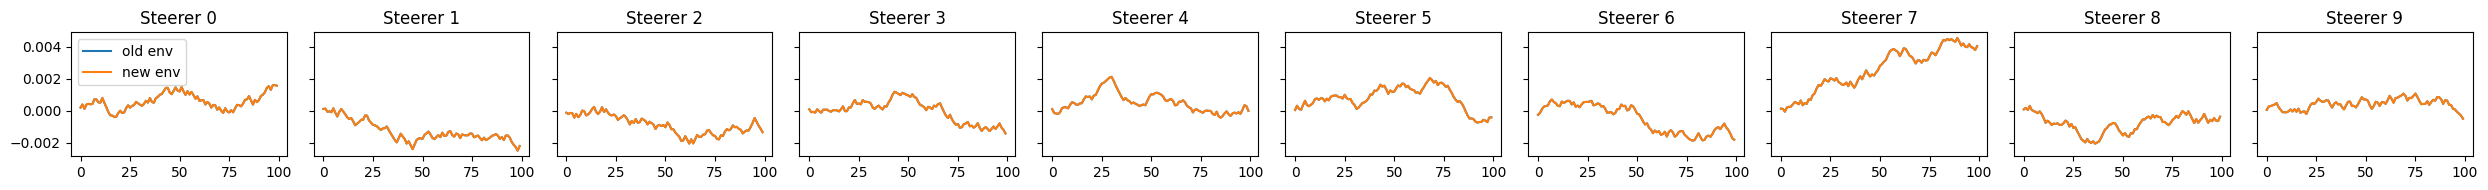

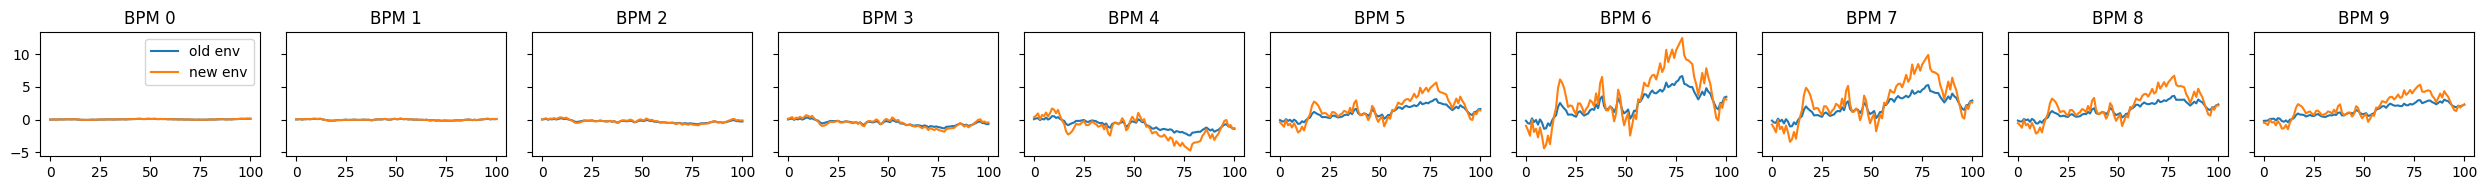

In [20]:
old_observations = []
new_observations = []
old_steerer_settings = []
new_steerer_settings = []

observation, info = old_env.reset()
old_observations.append(observation)

observation, info = wrapped_new_env.reset(options={"magnet_init": old_env.kicks_0})
new_observations.append(observation)

for _ in range(100):
    action = old_env.action_space.sample()

    observation, reward, terminated, truncated, info = old_env.step(action)
    old_observations.append(observation)
    old_steerer_settings.append(old_env.kicks_0)

    observation, reward, terminated, truncated, info = wrapped_new_env.step(action)
    new_observations.append(observation)
    new_steerer_settings.append(info["steerer_settings"])

old_observations = np.array(old_observations)
new_observations = np.array(new_observations)
old_steerer_settings = np.array(old_steerer_settings)
new_steerer_settings = np.array(new_steerer_settings)

fig, axs = plt.subplots(1, 10, figsize=(25, 2), sharex=True, sharey=True)
for i in range(10):
    axs[i].plot(old_steerer_settings[:, i], label="old env")
    axs[i].plot(new_steerer_settings[:, i], label="new env")
    axs[i].set_title(f"Steerer {i}")
axs[0].legend()
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 10, figsize=(25, 2), sharex=True, sharey=True)
for i in range(10):
    axs[i].plot(old_observations[:, i], label="old env")
    axs[i].plot(new_observations[:, i], label="new env")
    axs[i].set_title(f"BPM {i}")
axs[0].legend()
plt.tight_layout()
plt.show()

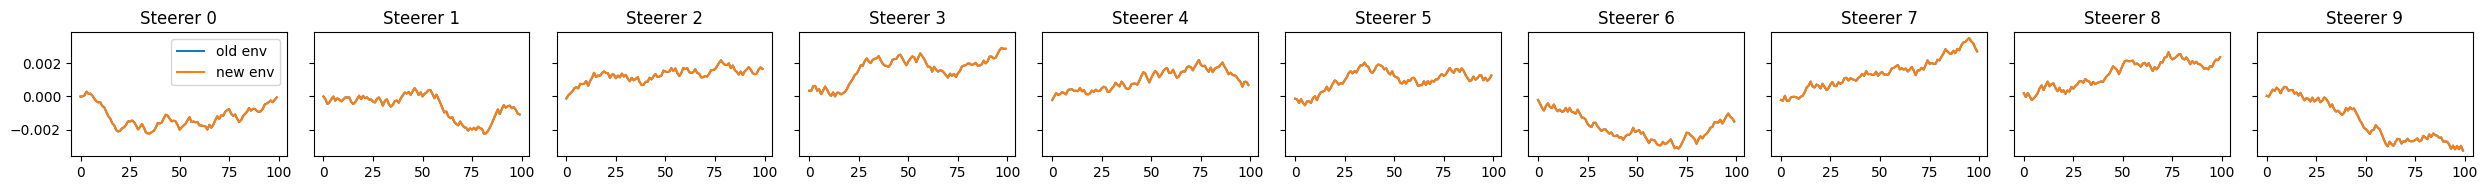

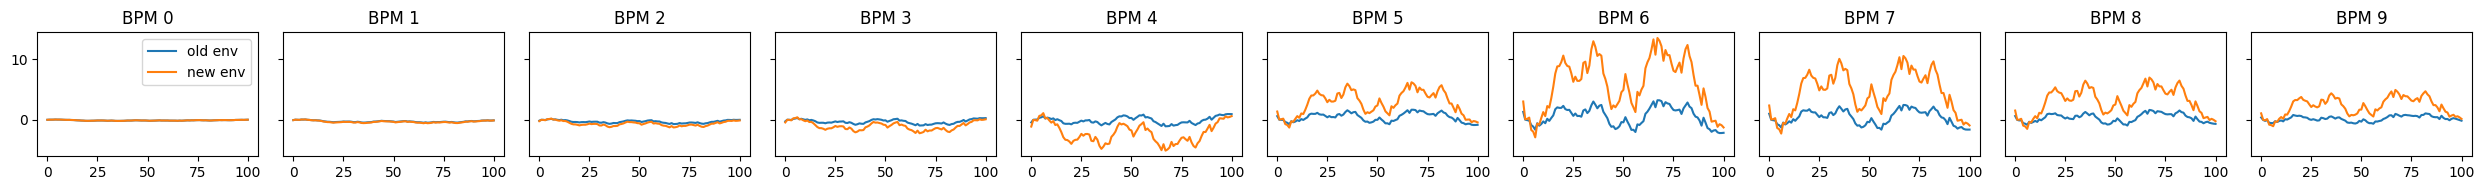

In [21]:
old_observations = []
new_observations = []
old_steerer_settings = []
new_steerer_settings = []

observation, info = old_env.reset()
old_observations.append(observation)

observation, info = wrapped_new_env.reset(options={"magnet_init": old_env.kicks_0})
new_observations.append(observation)

for _ in range(100):
    action = wrapped_new_env.action_space.sample()

    observation, reward, terminated, truncated, info = old_env.step(action)
    old_observations.append(observation)
    old_steerer_settings.append(old_env.kicks_0)

    observation, reward, terminated, truncated, info = wrapped_new_env.step(action)
    new_observations.append(observation)
    new_steerer_settings.append(info["steerer_settings"])

old_observations = np.array(old_observations)
new_observations = np.array(new_observations)
old_steerer_settings = np.array(old_steerer_settings)
new_steerer_settings = np.array(new_steerer_settings)

fig, axs = plt.subplots(1, 10, figsize=(25, 2), sharex=True, sharey=True)
for i in range(10):
    axs[i].plot(old_steerer_settings[:, i], label="old env")
    axs[i].plot(new_steerer_settings[:, i], label="new env")
    axs[i].set_title(f"Steerer {i}")
axs[0].legend()
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 10, figsize=(25, 2), sharex=True, sharey=True)
for i in range(10):
    axs[i].plot(old_observations[:, i], label="old env")
    axs[i].plot(new_observations[:, i], label="new env")
    axs[i].set_title(f"BPM {i}")
axs[0].legend()
plt.tight_layout()
plt.show()